In [ ]:
import numpy as np
import random

In [ ]:
# Function to simulate flipping 1000 coins, 10 times each
def flip_coins():
    # Generate random values between 0 (inclusive) and 1 (exclusive)
    flips = np.random.uniform(low=0, high=1, size=(1000, 10))

    # Apply condition: if value < 0.5, it's tails (0), else it's heads (1)
    flips = np.where(flips < 0.5, 0, 1)  # 0 for tails, 1 for heads

    heads_fraction = np.mean(flips, axis=1)  # Fraction of heads for each coin
    return heads_fraction

In [ ]:
# Perform the experiment and pick the three coins (c1, Crand, Cmin)
def select_coins(heads_fraction):
    c1 = heads_fraction[0]  # First coin
    crand = random.choice(heads_fraction)  # Randomly chosen coin
    cmin = np.min(heads_fraction)  # Coin with minimum fraction of heads
    return c1, crand, cmin

In [ ]:
# Running the experiment n times
def run_simulation(trials):
    V1_list, Vrand_list, Vmin_list = [], [], []
    for _ in range(trials):
        heads_fraction = flip_coins()
        V1, Vrand, Vmin = select_coins(heads_fraction)
        V1_list.append(V1)
        Vrand_list.append(Vrand)
        Vmin_list.append(Vmin)
    return V1_list, Vrand_list, Vmin_list

In [ ]:
V1_list, Vrand_list, Vmin_list = run_simulation(1)
# Calculate the mean µ
mu = np.mean([V1_list[0], Vrand_list[0], Vmin_list[0]])
print(f"V1: {V1_list[0]}, Vrand: {Vrand_list[0]}, Vmin: {Vmin_list[0]}, µ: {mu}")

V1: 0.5, Vrand: 0.8, Vmin: 0.0, µ: 0.43333333333333335


In [ ]:
import matplotlib.pyplot as plt

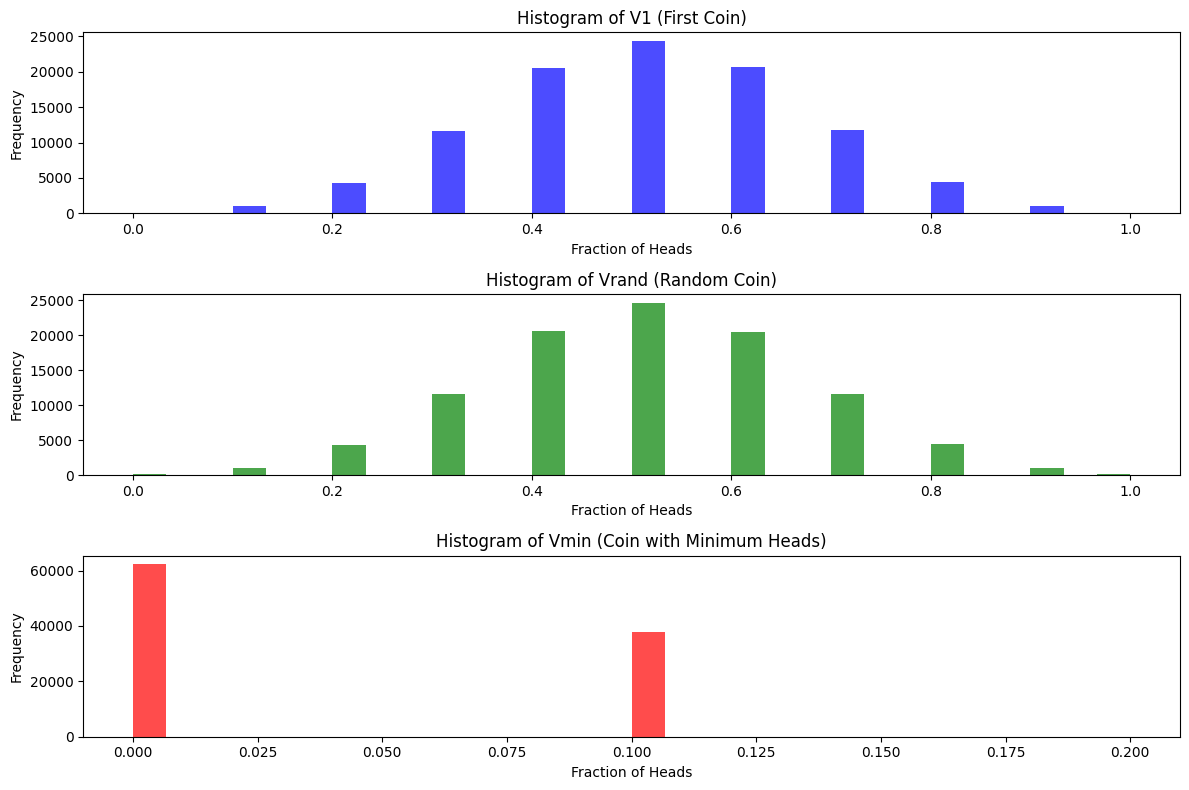

In [ ]:
# Running the experiment 100,000 times
V1_list, Vrand_list, Vmin_list = run_simulation(100000)
# Plot histograms for V1, Vrand, Vmin
def plot_histograms(V1_list, Vrand_list, Vmin_list):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.hist(V1_list, bins=30, alpha=0.7, color='blue', label='V1')
    plt.title('Histogram of V1 (First Coin)')
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Frequency')

    plt.subplot(3, 1, 2)
    plt.hist(Vrand_list, bins=30, alpha=0.7, color='green', label='Vrand')
    plt.title('Histogram of Vrand (Random Coin)')
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Frequency')

    plt.subplot(3, 1, 3)
    plt.hist(Vmin_list, bins=30, alpha=0.7, color='red', label='Vmin')
    plt.title('Histogram of Vmin (Coin with Minimum Heads)')
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histograms(V1_list, Vrand_list, Vmin_list)

In [ ]:
mu=[]
for i in range(100000):
        heads_fraction = flip_coins()
        mean_heads = np.mean(heads_fraction)
        mu.append(mean_heads)
mu_avg=np.mean(mu)
print(mu_avg)

0.5000124890000001


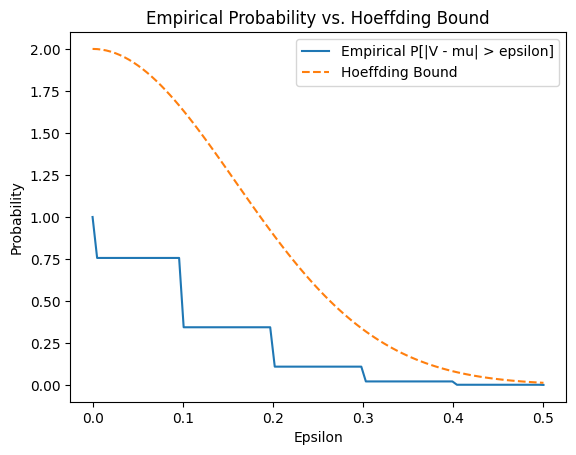

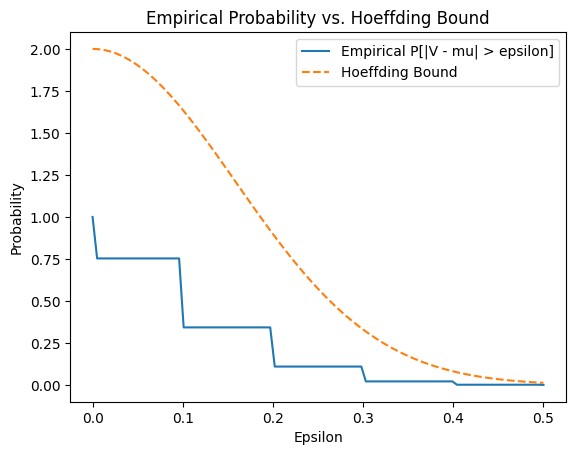

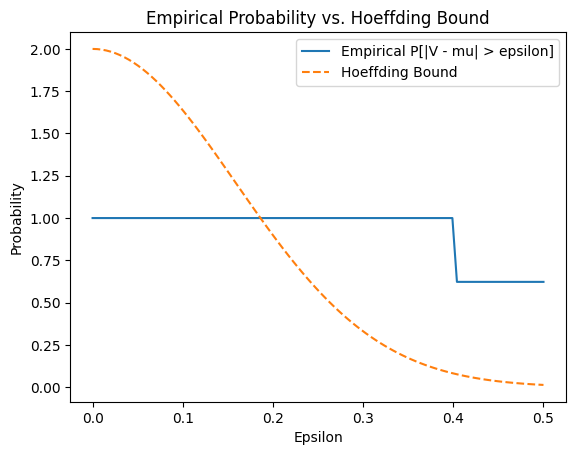

In [ ]:
# Function to estimate the probability P[|V - mu| > epsilon] and plot it against Hoeffding bound
def plot_hoeffding_bound(V_list, N=10):
    epsilons = np.linspace(0, 0.5, 100)

    # Estimate P[|V - mu| > epsilon]
    probabilities = [np.mean(np.abs(np.array(V_list) - mu_avg) > epsilon) for epsilon in epsilons]

    hoeffding_bound = [2 * np.exp(-2 * epsilon**2 * N) for epsilon in epsilons]

    plt.plot(epsilons, probabilities, label='Empirical P[|V - mu| > epsilon]')
    plt.plot(epsilons, hoeffding_bound, label='Hoeffding Bound', linestyle='--')
    plt.title('Empirical Probability vs. Hoeffding Bound')
    plt.xlabel('Epsilon')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Plot for V1, Vrand, and Vmin
plot_hoeffding_bound(V1_list)
plot_hoeffding_bound(Vrand_list)
plot_hoeffding_bound(Vmin_list)

C1 and Crand are obeying hoeffdings inequality but not Cmin according to the above plot.
V1 and Vrand typically obey the Hoeffding bound. This is because their heads fractions are not specifically selected to be extreme values.They follow a more "normal" distribution centered around 0.5 (average 50% heads).
Vmin does NOT follow the Hoeffding bound. This is because it is selected for its extreme value, which deviates significantly from the mean. It is chosen to have a small fraction of heads, and thus its probability of exceeding the bound is much higher than what the Hoeffding inequality would predict for a randomly selected coin.